---
title: Iris prediction with neural network
author: Haky Im
date: 1999-01-01
---

In [ ]:
## conda install pytorch torchvision torchaudio cudatoolkit=<version> -c pytorch

## (test-env) MED-ML-4210:1999-01-01-iris-dataset-analysis haekyungim$ conda install pytorch::pytorch torchvision torchaudio -c pytorch  
## pip install scikit-learn 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

In [3]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [4]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.long)


In [7]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 3)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [8]:
# Create an instance of the neural network
model = Net()


In [9]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [10]:
# Train the model
num_epochs = 100
batch_size = 16

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, X_train.size(0), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = Y_train[i:i+batch_size]
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {running_loss:.4f}")


Epoch 10: Loss = 7.9727
Epoch 20: Loss = 5.2169
Epoch 30: Loss = 3.1653
Epoch 40: Loss = 2.2043
Epoch 50: Loss = 1.5700
Epoch 60: Loss = 1.1596
Epoch 70: Loss = 0.9131
Epoch 80: Loss = 0.7656
Epoch 90: Loss = 0.6722
Epoch 100: Loss = 0.6093


In [11]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = torch.sum(predicted == Y_test).item() / Y_test.size(0)
    print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Accuracy: 100.00%


0


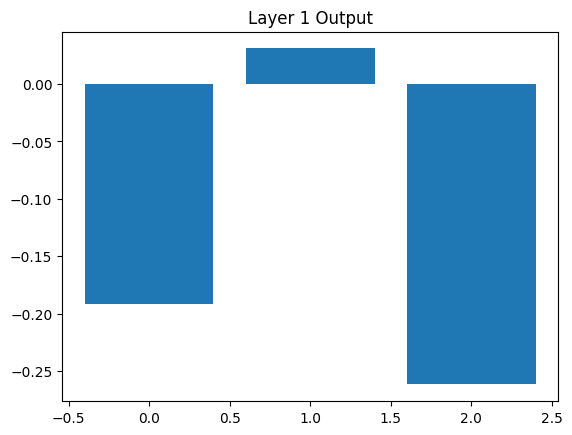

In [17]:
#import torch
#import torch.nn as nn
import matplotlib.pyplot as plt

# Assuming you have an input tensor 'input_tensor'
input_tensor = torch.tensor([1, 2, 3, 4], dtype=torch.float32)

# Create an instance of the 'Net' model
model = Net()

# Set the model to evaluation mode
model.eval()

# Store the intermediate layer outputs
outputs = []

# Forward pass and store intermediate outputs
def hook(module, input, output):
    outputs.append(output)

# Register the hook to capture intermediate outputs
hook_handle = model.fc3.register_forward_hook(hook)
model(input_tensor.unsqueeze(0))
hook_handle.remove()

# Plot the intermediate outputs
for i, output in enumerate(outputs):
    print(i)
    plt.figure()
    plt.title(f'Layer {i+1} Output')
    plt.bar(range(output.size(-1)), output.squeeze().detach().numpy())
    plt.show()


In [18]:
enumerate(outputs)

In [22]:

outputs


[tensor([[-0.1914,  0.0311, -0.2617]], grad_fn=<AddmmBackward0>)]